# Название проекта: "Большой БигДатовский и Властелин Пандаса: Анализ фильмов и сериалов с IMBD"

## Описание датасета:


IMDB - это популярный зарубежный сайт с рейтингами на кино и сериалы. Там любой желающий может поставить рейтинг фильму или сериалу, а также написать рецензию.

Этот датасет содержит более 7-ми тысяч фильмов и сериалов с оценками, взятыми с IMDB.

### Содержание

Колонки

Name: Название фильма/сериала

Data: Дата создания

Rate: Рейтинг с IMDB

Votes: Количества голосов

Genre: Жанр

Duration: Продолжительность

Type: тип ('Series' или 'Film')

### Возрастной рейтинг:

TV-Y: Designed to be appropriate for all children

TV-Y7: Suitable for ages 7 and up

G: Suitable for General Audiences

TV-G: Suitable for General Audiences

PG: Parental Guidance suggested

TV-PG: Parental Guidance suggested

PG-13: Parents strongly cautioned. May be Inappropriate for ages 12 and under.

TV-14: Parents strongly cautioned. May not be suitable for ages 14 and under.

R: Restricted. May be inappropriate for ages 17 and under.

TV-MA: For Mature Audiences. May not be suitable for ages 17 and under.

NC-17: Inappropriate for ages 17 and under

### Доп столбцы

Episodes: Number of Episodes only for series

Nudity, violence and etc.: How much does it have of these

Ссылка на датасет: [IMDB-Rating](https://www.kaggle.com/datasets/mazenramadan/imdb-most-popular-films-and-series)

Let's code!!! 

In [445]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

# Причесываем датасет

In [446]:
data = pd.read_csv(r'/Users/User/Desktop/VS code/BDA_2024-2025/project/imdb.csv')
data

,Name,Date,Rate,Votes,Genre,Duration,Type,Certificate,Episodes,Nudity,Violence,Profanity,Alcohol,Frightening
0,No Time to Die,2021,7.6,"107,163","Action, Adventure, Thriller",163.0,Film,PG-13,-,Mild,Moderate,Mild,Mild,Moderate
1,The Guilty,2021,6.3,"64,375","Crime, Drama, Thriller",90.0,Film,R,-,NaN,NaN,Severe,NaN,Moderate
2,The Many Saints of Newark,2021,6.4,"27,145","Crime, Drama",120.0,Film,R,-,Moderate,Severe,Severe,Moderate,Moderate
3,Venom: Let There Be Carnage,2021,6.4,"30,443","Action, Adventure, Sci-Fi",97.0,Film,PG-13,-,NaN,Moderate,Moderate,Mild,Moderate
4,Dune,2021,8.3,"84,636","Action, Adventure, Drama",155.0,Film,PG-13,-,NaN,Moderate,NaN,Mild,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6173,The Human Centipede II (Full Sequence),2011,3.8,"37,492",Horror,91.0,Film,Not Rated,-,Severe,Severe,Severe,Mild,Severe
6174,Double Indemnity,1944,8.3,"150,448","Crime, Drama, Film-Noir",107.0,Film,Passed,-,NaN,Mild,NaN,Mild,Mild
6175,Before the Devil Knows You're Dead,2007,7.3,"100,668","Crime, Drama, Thriller",117.0,Film,R,-,Severe,Moderate,Severe,Severe,Severe
6176,Queen Bees,2021,6.0,887,"Comedy, Drama, Romance",100.0,Film,PG-13,-,NaN,NaN,Mild,Moderate,NaN


Удалим повторяющиеся фильмы и сериалы (поверьте, они есть)

In [447]:
data = data.drop_duplicates(subset='Name')
data

,Name,Date,Rate,Votes,Genre,Duration,Type,Certificate,Episodes,Nudity,Violence,Profanity,Alcohol,Frightening
0,No Time to Die,2021,7.6,"107,163","Action, Adventure, Thriller",163.0,Film,PG-13,-,Mild,Moderate,Mild,Mild,Moderate
1,The Guilty,2021,6.3,"64,375","Crime, Drama, Thriller",90.0,Film,R,-,NaN,NaN,Severe,NaN,Moderate
2,The Many Saints of Newark,2021,6.4,"27,145","Crime, Drama",120.0,Film,R,-,Moderate,Severe,Severe,Moderate,Moderate
3,Venom: Let There Be Carnage,2021,6.4,"30,443","Action, Adventure, Sci-Fi",97.0,Film,PG-13,-,NaN,Moderate,Moderate,Mild,Moderate
4,Dune,2021,8.3,"84,636","Action, Adventure, Drama",155.0,Film,PG-13,-,NaN,Moderate,NaN,Mild,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5023,The Human Centipede II (Full Sequence),2011,3.8,"37,492",Horror,91.0,Film,Not Rated,-,Severe,Severe,Severe,Mild,Severe
5024,Double Indemnity,1944,8.3,"150,448","Crime, Drama, Film-Noir",107.0,Film,Passed,-,NaN,Mild,NaN,Mild,Mild
5025,Before the Devil Knows You're Dead,2007,7.3,"100,668","Crime, Drama, Thriller",117.0,Film,R,-,Severe,Moderate,Severe,Severe,Severe
5026,Queen Bees,2021,6.0,887,"Comedy, Drama, Romance",100.0,Film,PG-13,-,NaN,NaN,Mild,Moderate,NaN


Уберем фильмы/сериалы без рейтинга

In [448]:
data = data[data['Rate'] != 'No Rate']

# Исследование среднего рейтинга в зависимости от жанра

Найдем количество уникальных жанров в нашем датасете

In [449]:
uniq_genre = []
for genres in data['Genre']:
    genres = genres.split(', ')
    for name in genres:
        if name not in uniq_genre:
            uniq_genre.append(name)

uniq_genre

['Action',
 'Adventure',
 'Thriller',
 'Crime',
 'Drama',
 'Sci-Fi',
 'Comedy',
 'Sport',
 'Animation',
 'Horror',
 'Mystery',
 'Romance',
 'History',
 'Fantasy',
 'Biography',
 'Family',
 'Western',
 'Musical',
 'Music',
 'War',
 'Short',
 'Reality-TV',
 'Documentary',
 'Film-Noir',
 'Game-Show',
 'Talk-Show',
 'News']

Найдем среднюю оценку для каждого жанра

In [450]:
len(uniq_genre)

27

In [451]:
genre_rate = dict.fromkeys(uniq_genre, 0)
genre_count = dict.fromkeys(uniq_genre, 0)


for _, film in data.iterrows():
    film_genres = film['Genre'].split(', ')
    for genre in film_genres:
        genre_rate[genre]+= float(film['Rate'])
        genre_count[genre] += 1

mean_rate = []
for genre in uniq_genre:
    mean_rate.append(genre_rate[genre]/genre_count[genre])

Сделаем общую таблицу для всех жанров

In [452]:
genres_stats = pd.DataFrame(data = np.column_stack((list(genre_rate.values()), list(genre_count.values()), mean_rate)), columns = ['Sum of ratings', 'Num of films/series', 'Mean rating'], index=uniq_genre)
genres_stats = genres_stats.sort_values(by='Mean rating', ascending=False)
genres_stats

,Sum of ratings,Num of films/series,Mean rating
News,8.9,1.0,8.900000
Talk-Show,16.3,2.0,8.150000
Film-Noir,39.6,5.0,7.920000
Documentary,169.6,22.0,7.709091
War,406.9,54.0,7.535185
Animation,2216.2,297.0,7.461953
History,1076.9,145.0,7.426897
Biography,1714.4,233.0,7.357940
Western,348.9,48.0,7.268750
Sport,450.1,62.0,7.259677


Text(0.5, 1.0, 'Средний рейтинг для каждого уникального жанра в датасете')

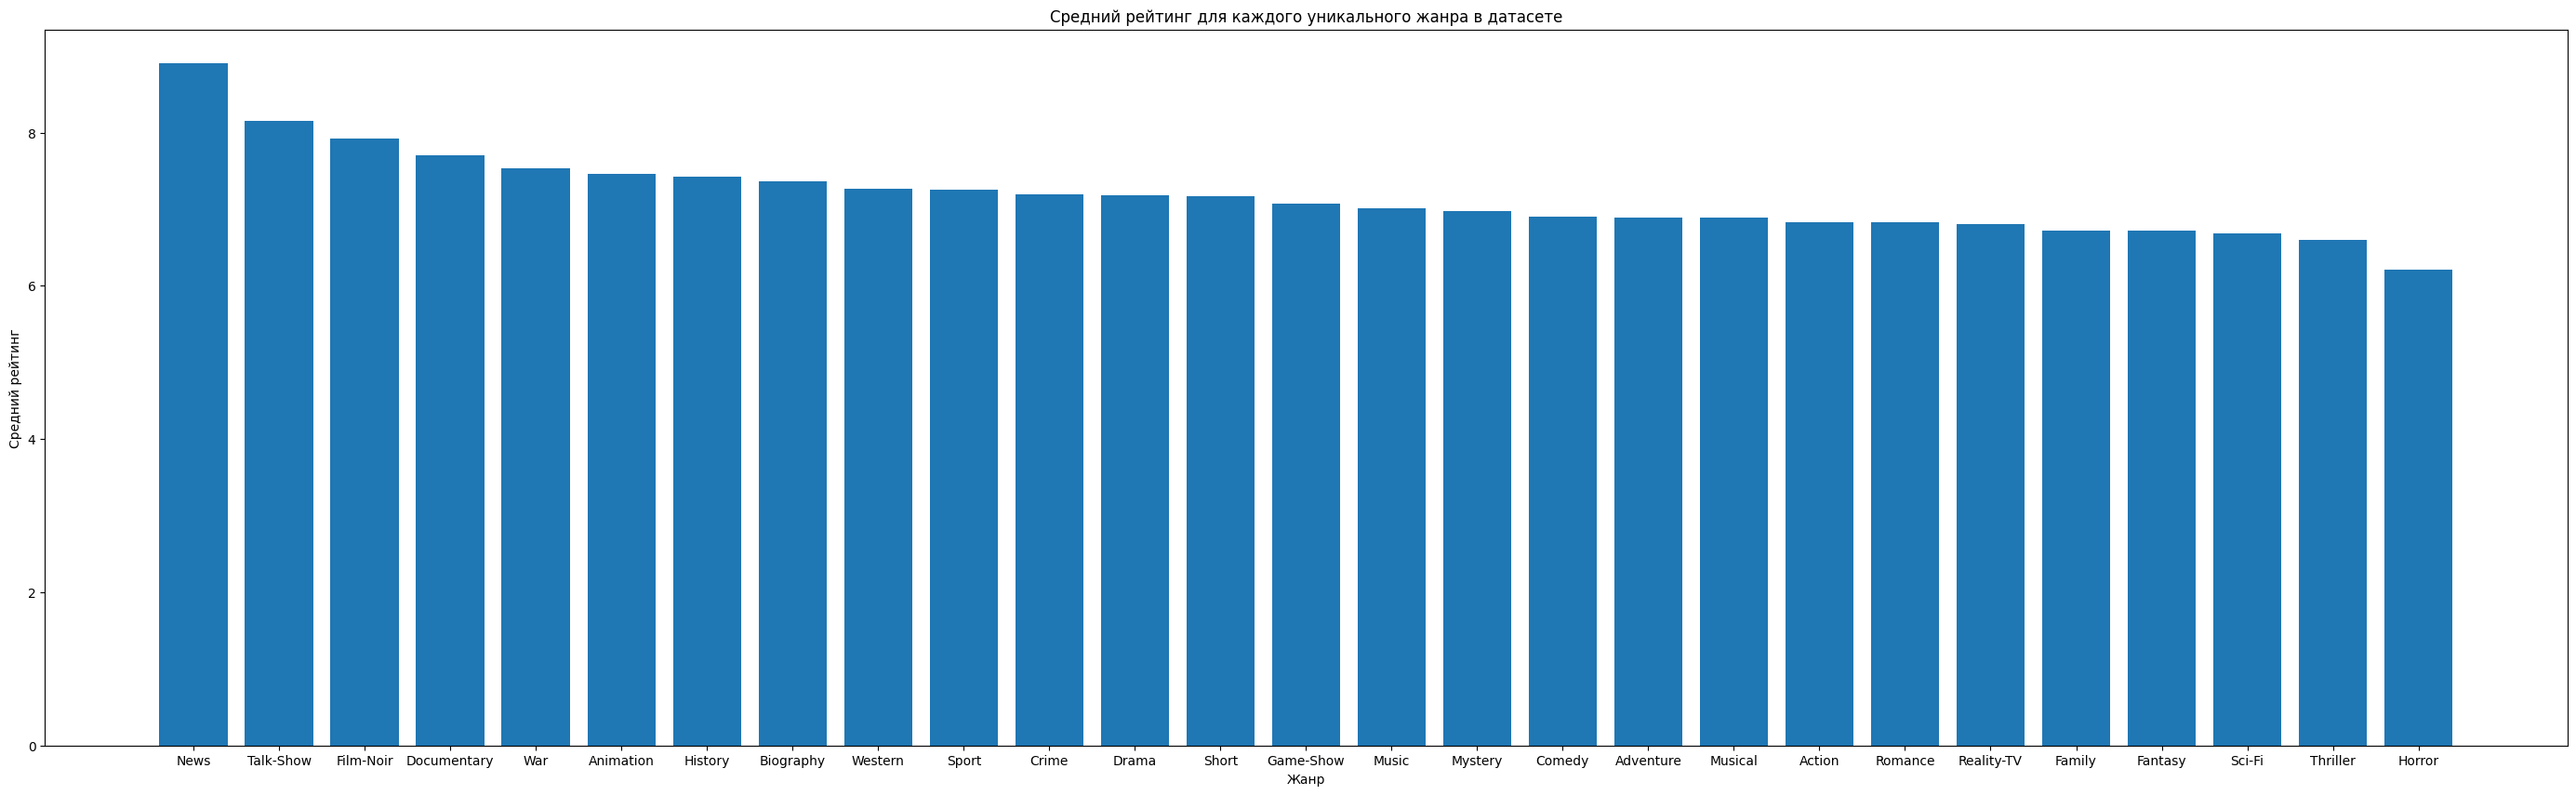

In [453]:
plt.figure(figsize=(35,10))
plt.bar(genres_stats.index, genres_stats['Mean rating'])
plt.xlabel('Жанр')
plt.ylabel('Средний рейтинг')
plt.title('Средний рейтинг для каждого уникального жанра в датасете')

Новости очень парадоксально вырвались вперед. Возможно это связанно с тем, что их в принципе мало в датасете.

In [454]:
genres_stats = genres_stats.sort_values(by='Num of films/series', ascending=False)

Text(0.5, 1.0, 'Количество фильмов/сериалов для каждого уникального жанра в датасете')

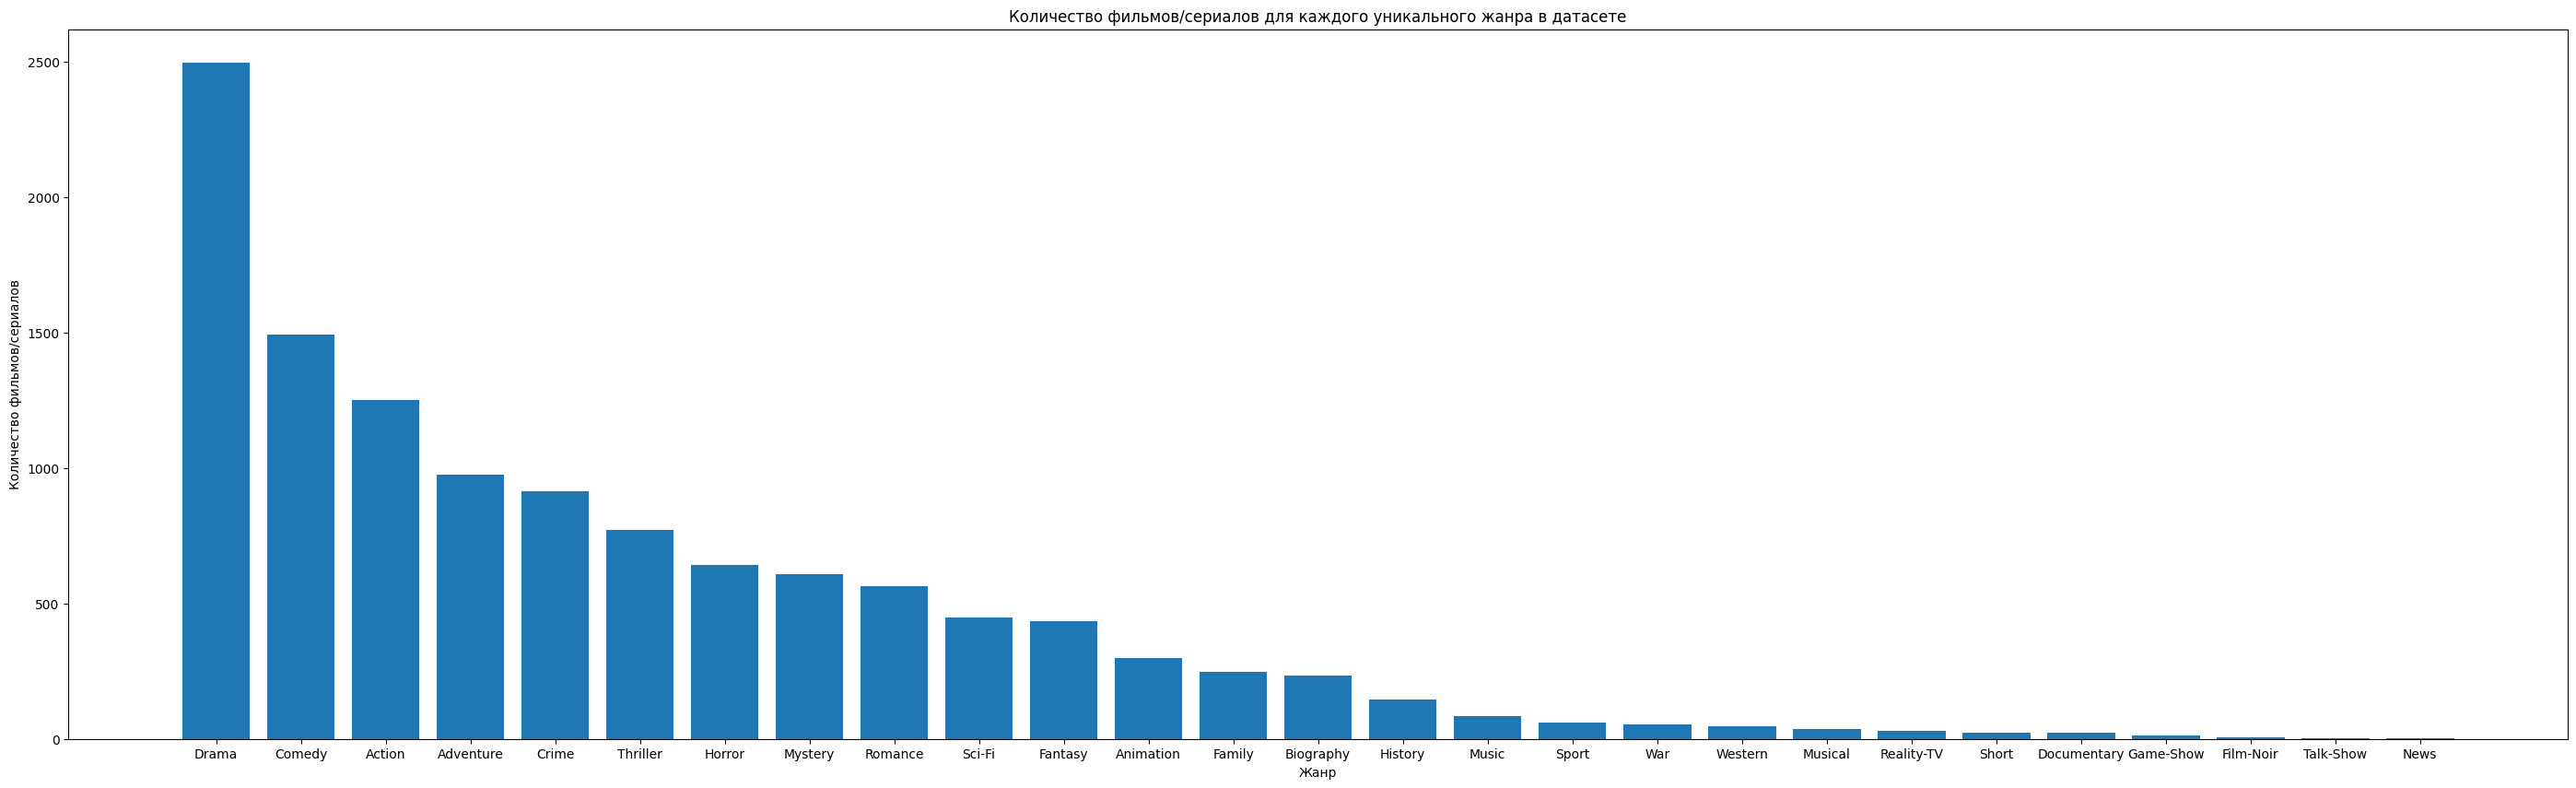

In [455]:
plt.figure(figsize=(35,10))
plt.bar(genres_stats.index, genres_stats['Num of films/series'])
plt.xlabel('Жанр')
plt.ylabel('Количество фильмов/сериалов')
plt.title('Количество фильмов/сериалов для каждого уникального жанра в датасете')

Видно, что количество фильмов/сериалов на темы 'News', 'Film-Noir', 'Game-Show', 'Talk-Show' мало. Поэтому усреднять рейтинг по этим величинам не имеет смысла. Смотрим на усредненные рейтинги только для тех жанров, которые встречаются более 500 раз.

Таким образом самый высоко оценненный жанр среди популярных (то есть где количество произведений >= 500) это...

In [456]:
pop_genres_stats = genres_stats[genres_stats['Num of films/series'] >= 500].sort_values(by='Mean rating', ascending=False)

Text(0.5, 1.0, 'Средний рейтинг для каждого уникального жанра в датасете')

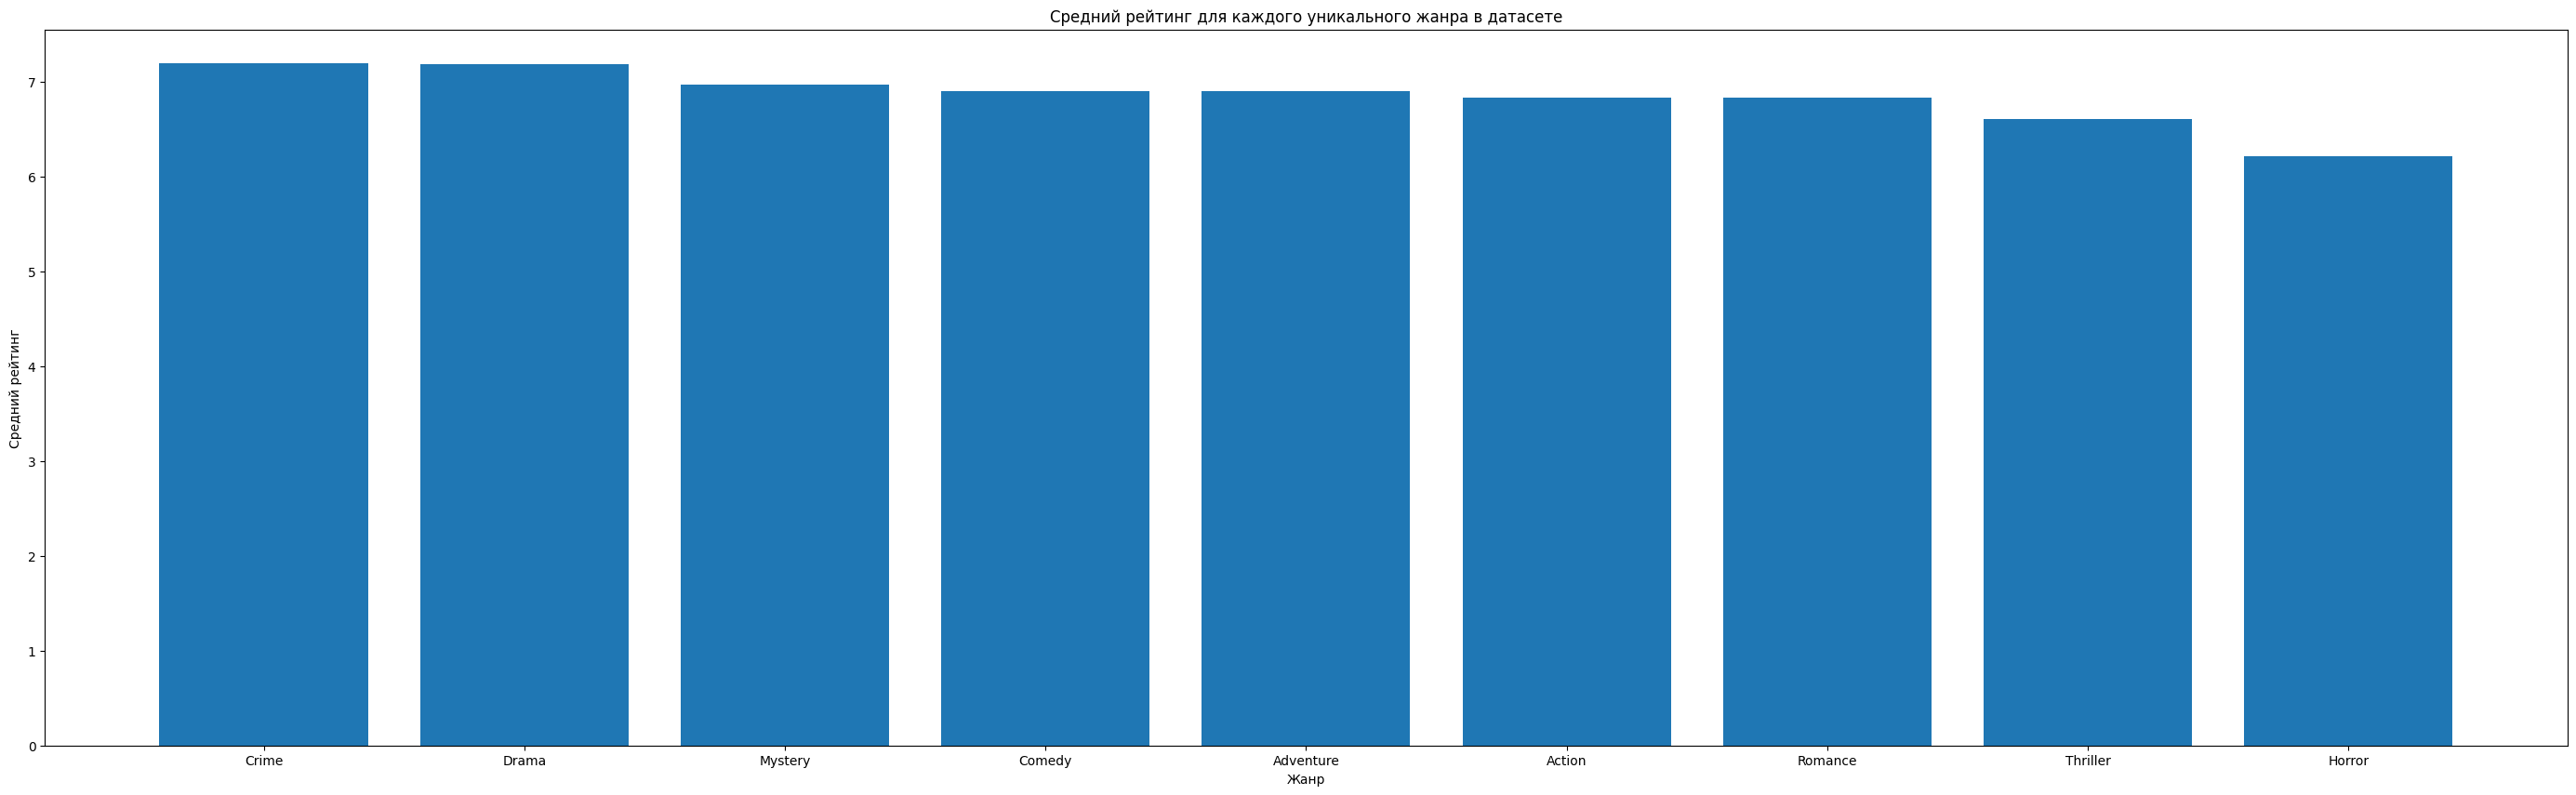

In [457]:
plt.figure(figsize=(35,10))
plt.bar(pop_genres_stats.index, pop_genres_stats['Mean rating'])
plt.xlabel('Жанр')
plt.ylabel('Средний рейтинг')
plt.title('Средний рейтинг для каждого уникального жанра в датасете')

Криминал победил драму (хоть и на пару тысячных). Это может быть связано с тем, что у нас очень много фильмов и сериалов на тему криминала, которые культурно значимы в обществе: "Криминальное чтиво", "Крестный отец", "Славные парни", "Однажды в Америке", художественный фильм "Snatch" и т.д.

Самый неоценный из "популярных" жанров - Хоррор. Не мудренно...

# Исследование количества оценок по жанру

In [458]:
uniq_genre

['Action',
 'Adventure',
 'Thriller',
 'Crime',
 'Drama',
 'Sci-Fi',
 'Comedy',
 'Sport',
 'Animation',
 'Horror',
 'Mystery',
 'Romance',
 'History',
 'Fantasy',
 'Biography',
 'Family',
 'Western',
 'Musical',
 'Music',
 'War',
 'Short',
 'Reality-TV',
 'Documentary',
 'Film-Noir',
 'Game-Show',
 'Talk-Show',
 'News']

In [459]:
genre_count

{'Action': 1253,
 'Adventure': 976,
 'Thriller': 771,
 'Crime': 914,
 'Drama': 2496,
 'Sci-Fi': 449,
 'Comedy': 1493,
 'Sport': 62,
 'Animation': 297,
 'Horror': 642,
 'Mystery': 609,
 'Romance': 564,
 'History': 145,
 'Fantasy': 434,
 'Biography': 233,
 'Family': 249,
 'Western': 48,
 'Musical': 38,
 'Music': 83,
 'War': 54,
 'Short': 24,
 'Reality-TV': 31,
 'Documentary': 22,
 'Film-Noir': 5,
 'Game-Show': 14,
 'Talk-Show': 2,
 'News': 1}

In [460]:
data_votes = data["Votes"]
print(len(data_votes))
data_votes = data_votes[data_votes != 'No Votes']
print(len(data_votes))
genres_series_votes = pd.Series(np.zeros(len(uniq_genre)), index=uniq_genre)

4674
4674


In [461]:
genre_vote = dict.fromkeys(uniq_genre, 0)

for _, film in data.iterrows():
    film_genres = film['Genre'].split(', ')
    for genre in film_genres:
        genre_vote[genre]+= float(film['Votes'].replace(',',''))

mean_vote = []
for genre in uniq_genre:
    mean_vote.append(genre_vote[genre]/genre_count[genre])

Отсортуруем по количеству оценок

In [462]:
genres_votes = pd.DataFrame(data = np.column_stack((list(genre_vote.values()), list(genre_count.values()), mean_vote)), columns = ['Sum of votes', 'Num of films/series', 'Mean vote'], index=uniq_genre)
genres_votes_sum = genres_votes.sort_values(by='Sum of votes', ascending=False)
genres_votes_sum

,Sum of votes,Num of films/series,Mean vote
Drama,320351914.0,2496.0,128346.119391
Action,240683733.0,1253.0,192085.980048
Adventure,208195735.0,976.0,213315.302254
Comedy,173554916.0,1493.0,116245.757535
Crime,126952254.0,914.0,138897.433260
Thriller,110846656.0,771.0,143769.981842
Sci-Fi,103389741.0,449.0,230266.683742
Mystery,73573618.0,609.0,120810.538588
Fantasy,71146499.0,434.0,163932.025346
Romance,65501494.0,564.0,116137.400709


Text(0.5, 0, 'Жанр фильма/сериала')

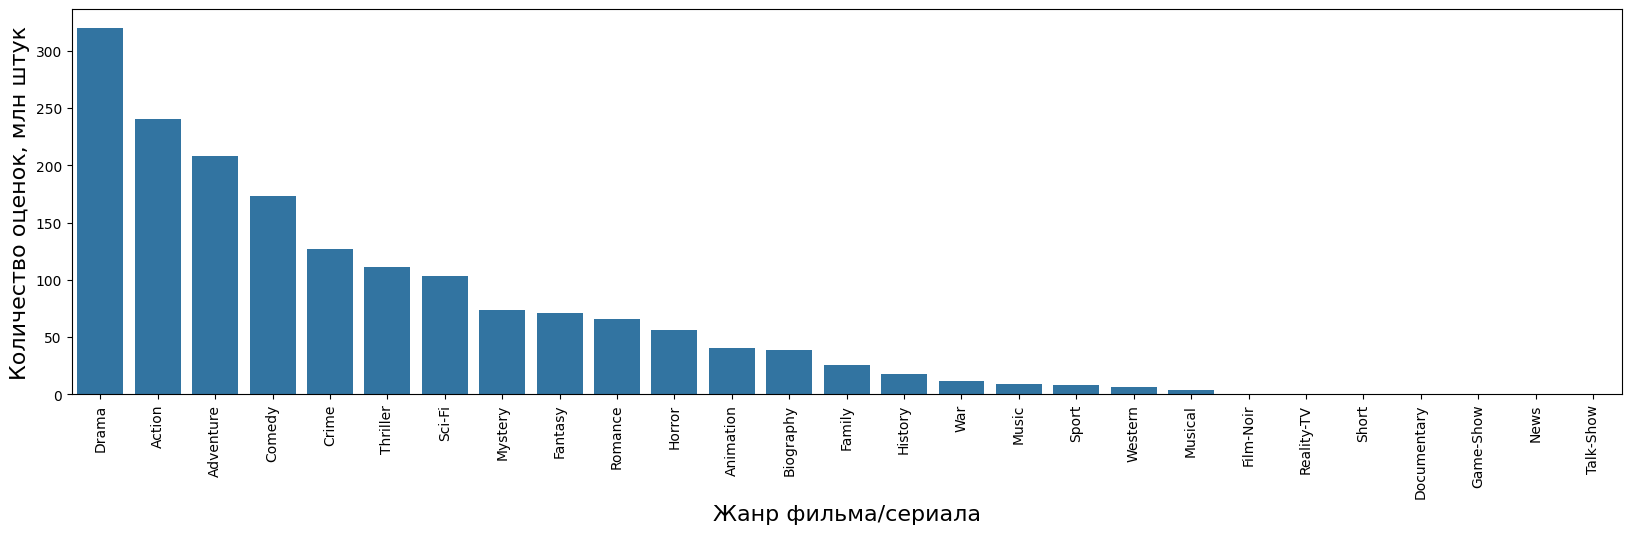

In [463]:
plt.figure(figsize=(20,5))
sns.barplot(x=genres_votes_sum.index,
            y=genres_votes_sum['Sum of votes'] / 1_000_000)
plt.xticks(rotation=90)
plt.ylabel("Количество оценок, млн штук", fontsize=16)
plt.xlabel("Жанр фильма/сериала", fontsize=16)


Видно, что самые оцениваемые жанры это "Drama", "Action", "Adventure". Жанры с наименьшим количеством оценок: "Game-Show", "News", "Talk-Show"

In [464]:
genres_votes_mean = genres_votes.sort_values(by='Mean vote', ascending=False)
genres_votes_mean

,Sum of votes,Num of films/series,Mean vote
Sci-Fi,103389741.0,449.0,230266.683742
Adventure,208195735.0,976.0,213315.302254
War,11193518.0,54.0,207287.370370
Action,240683733.0,1253.0,192085.980048
Biography,38521840.0,233.0,165329.785408
Fantasy,71146499.0,434.0,163932.025346
Thriller,110846656.0,771.0,143769.981842
Crime,126952254.0,914.0,138897.433260
Animation,40571950.0,297.0,136605.892256
Sport,8108487.0,62.0,130782.048387


Text(0.5, 0, 'Жанр фильма/сериала')

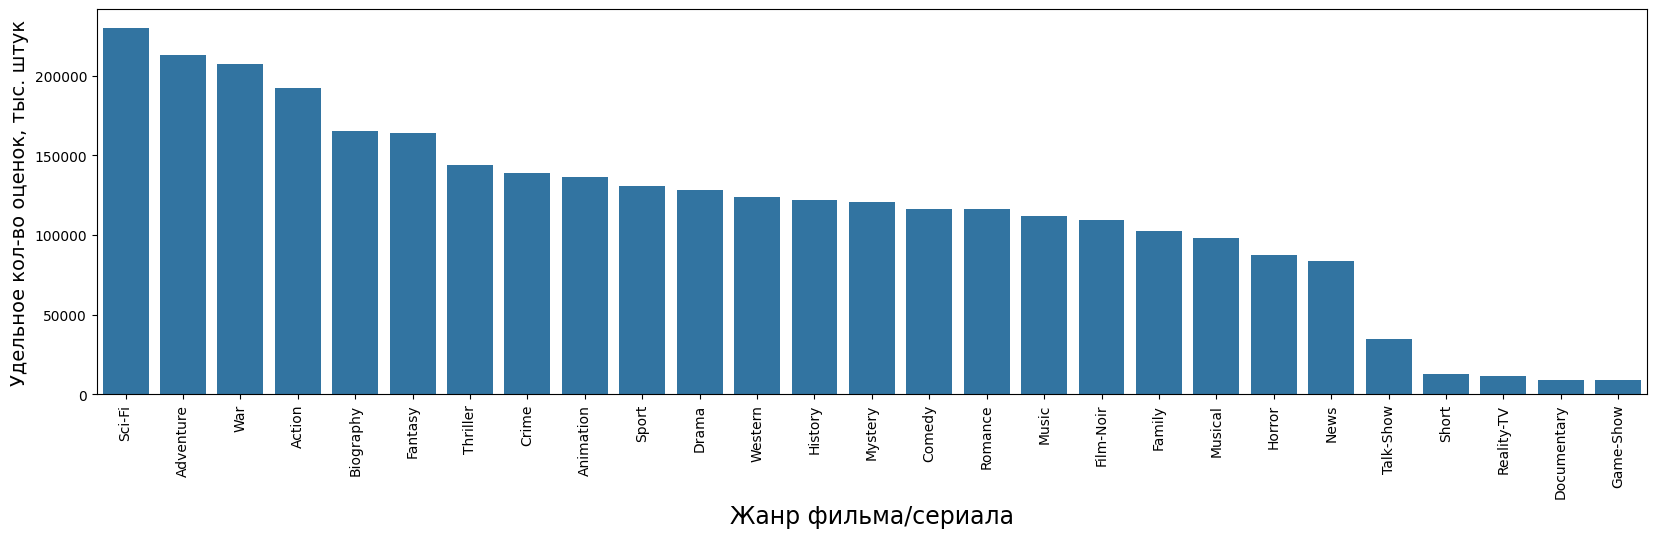

In [465]:
plt.figure(figsize=(20,5))
sns.barplot(x=genres_votes_mean.index,
            y=genres_votes_mean['Mean vote'])
plt.xticks(rotation=90)
plt.ylabel("Удельное кол-во оценок, тыс. штук", fontsize=14)
plt.xlabel("Жанр фильма/сериала", fontsize=17)

Анализируя удельное количество оценок видеконтента, мы видим, что самымыми популярными по этому параметру жанры: "Sci-Fi", "Adventure", "War". Видимо эти жанры вызывают сильные эмоции, которые в свою очередь побуждают оставить оценку. Можно отметить, что жанр "Game show" в конце списка как по полному количеству оценок, так и удельному.

# Исследование длительности фильма в зависимости от жанра

Выделим только фильмы:


In [466]:
Films = data[data['Type'] == 'Film']
Films

,Name,Date,Rate,Votes,Genre,Duration,Type,Certificate,Episodes,Nudity,Violence,Profanity,Alcohol,Frightening
0,No Time to Die,2021,7.6,"107,163","Action, Adventure, Thriller",163.0,Film,PG-13,-,Mild,Moderate,Mild,Mild,Moderate
1,The Guilty,2021,6.3,"64,375","Crime, Drama, Thriller",90.0,Film,R,-,NaN,NaN,Severe,NaN,Moderate
2,The Many Saints of Newark,2021,6.4,"27,145","Crime, Drama",120.0,Film,R,-,Moderate,Severe,Severe,Moderate,Moderate
3,Venom: Let There Be Carnage,2021,6.4,"30,443","Action, Adventure, Sci-Fi",97.0,Film,PG-13,-,NaN,Moderate,Moderate,Mild,Moderate
4,Dune,2021,8.3,"84,636","Action, Adventure, Drama",155.0,Film,PG-13,-,NaN,Moderate,NaN,Mild,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5023,The Human Centipede II (Full Sequence),2011,3.8,"37,492",Horror,91.0,Film,Not Rated,-,Severe,Severe,Severe,Mild,Severe
5024,Double Indemnity,1944,8.3,"150,448","Crime, Drama, Film-Noir",107.0,Film,Passed,-,NaN,Mild,NaN,Mild,Mild
5025,Before the Devil Knows You're Dead,2007,7.3,"100,668","Crime, Drama, Thriller",117.0,Film,R,-,Severe,Moderate,Severe,Severe,Severe
5026,Queen Bees,2021,6.0,887,"Comedy, Drama, Romance",100.0,Film,PG-13,-,NaN,NaN,Mild,Moderate,NaN


Убираем фильмы с NaN значениями 'Duration'

In [467]:
Films = Films.dropna(subset=['Duration'])
Films

,Name,Date,Rate,Votes,Genre,Duration,Type,Certificate,Episodes,Nudity,Violence,Profanity,Alcohol,Frightening
0,No Time to Die,2021,7.6,"107,163","Action, Adventure, Thriller",163.0,Film,PG-13,-,Mild,Moderate,Mild,Mild,Moderate
1,The Guilty,2021,6.3,"64,375","Crime, Drama, Thriller",90.0,Film,R,-,NaN,NaN,Severe,NaN,Moderate
2,The Many Saints of Newark,2021,6.4,"27,145","Crime, Drama",120.0,Film,R,-,Moderate,Severe,Severe,Moderate,Moderate
3,Venom: Let There Be Carnage,2021,6.4,"30,443","Action, Adventure, Sci-Fi",97.0,Film,PG-13,-,NaN,Moderate,Moderate,Mild,Moderate
4,Dune,2021,8.3,"84,636","Action, Adventure, Drama",155.0,Film,PG-13,-,NaN,Moderate,NaN,Mild,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5023,The Human Centipede II (Full Sequence),2011,3.8,"37,492",Horror,91.0,Film,Not Rated,-,Severe,Severe,Severe,Mild,Severe
5024,Double Indemnity,1944,8.3,"150,448","Crime, Drama, Film-Noir",107.0,Film,Passed,-,NaN,Mild,NaN,Mild,Mild
5025,Before the Devil Knows You're Dead,2007,7.3,"100,668","Crime, Drama, Thriller",117.0,Film,R,-,Severe,Moderate,Severe,Severe,Severe
5026,Queen Bees,2021,6.0,887,"Comedy, Drama, Romance",100.0,Film,PG-13,-,NaN,NaN,Mild,Moderate,NaN


Ищем уникальные жанры для фильмов

In [468]:
uniq_films_genre = []
for genres in Films['Genre']:
    genres = genres.split(', ')
    for name in genres:
        if name not in uniq_films_genre:
            uniq_films_genre.append(name)

uniq_films_genre

['Action',
 'Adventure',
 'Thriller',
 'Crime',
 'Drama',
 'Sci-Fi',
 'Comedy',
 'History',
 'Fantasy',
 'Horror',
 'Mystery',
 'Animation',
 'Family',
 'Romance',
 'Western',
 'Musical',
 'Biography',
 'Music',
 'War',
 'Short',
 'Sport',
 'Film-Noir',
 'Documentary']

In [469]:
len(uniq_films_genre)

23

Стало меньше по сравнению со всем списком и фильмов и сериалов

In [470]:
genre_films_duration = dict.fromkeys(uniq_films_genre, 0)
genre_films_count = dict.fromkeys(uniq_films_genre, 0)

for _, film in Films.iterrows():
    film_genres = film['Genre'].split(', ')
    for genre in film_genres:

        genre_films_duration[genre] += float(film['Duration'])
        genre_films_count[genre] += 1

mean_duration= []
for genre in uniq_films_genre:
    mean_duration.append(genre_films_duration[genre]/genre_films_count[genre])

Сделаем табличку со всеми посчитанными данными

In [471]:
genres_films_stats = pd.DataFrame(data = np.column_stack((list(genre_films_duration.values()), list(genre_films_count.values()), mean_duration)), columns = ['Sum of durations', 'Num of films', 'Mean duration'], index=uniq_films_genre)
genres_films_stats = genres_films_stats.sort_values(by='Mean duration', ascending=False)
genres_films_stats

,Sum of durations,Num of films,Mean duration
History,14337.0,105.0,136.542857
War,5866.0,45.0,130.355556
Biography,26767.0,209.0,128.071770
Western,4681.0,38.0,123.184211
Drama,188309.0,1602.0,117.546192
Musical,3847.0,33.0,116.575758
Action,110665.0,954.0,116.001048
Adventure,87582.0,759.0,115.391304
Crime,63864.0,554.0,115.277978
Sport,5451.0,48.0,113.562500


Text(0.5, 1.0, 'Средняя продолжительность для каждого уникального жанра в датасете')

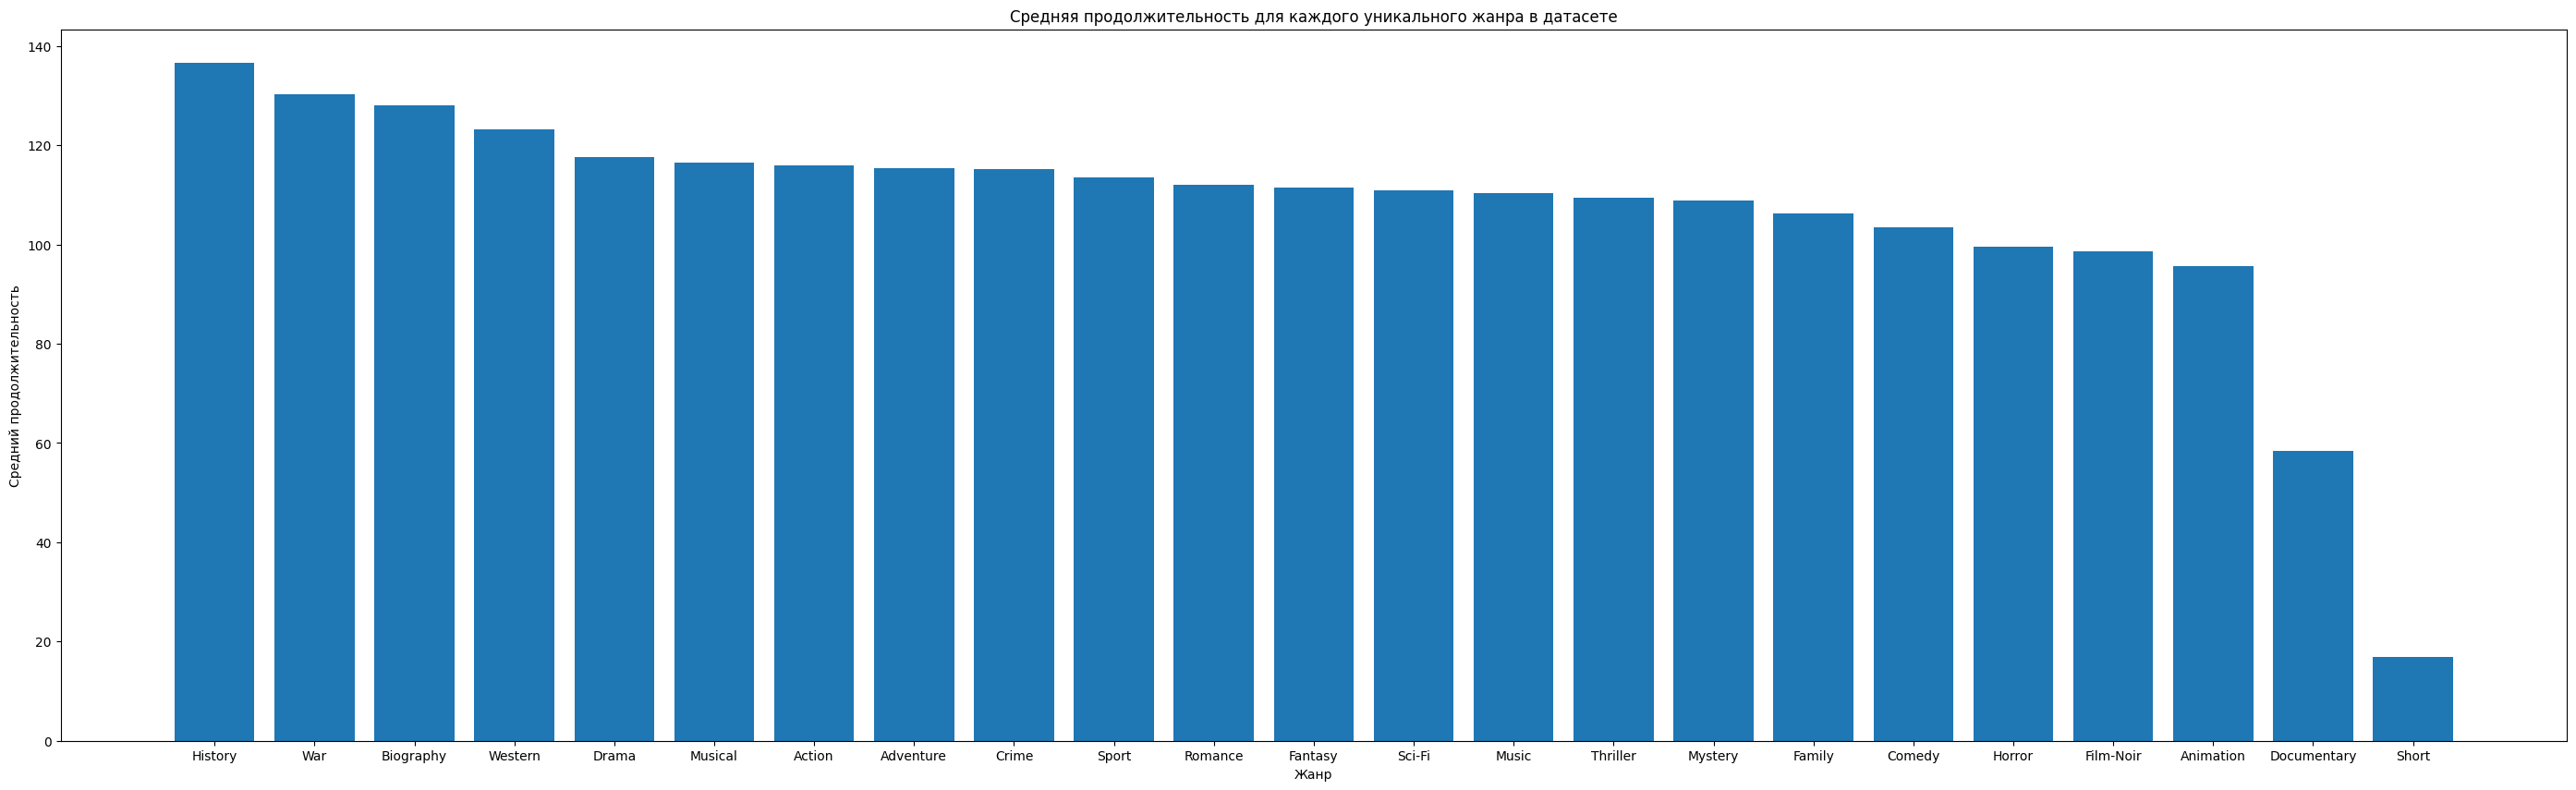

In [472]:
plt.figure(figsize=(35,10))
plt.bar(genres_films_stats.index, genres_films_stats['Mean duration'])
plt.xlabel('Жанр')
plt.ylabel('Средний продолжительность')
plt.title('Средняя продолжительность для каждого уникального жанра в датасете')

Историческое кино победило. Выделим самые продолжительные исторические фильмы!

In [473]:
Films.sort_values(by='Duration', ascending=False)

,Name,Date,Rate,Votes,Genre,Duration,Type,Certificate,Episodes,Nudity,Violence,Profanity,Alcohol,Frightening
284,Zack Snyder's Justice League,2021,8.1,"340,603","Action, Adventure, Fantasy",242.0,Film,R,-,NaN,Moderate,Mild,Mild,Moderate
1700,Gone with the Wind,1939,8.1,"302,134","Drama, History, Romance",238.0,Film,Passed,-,Mild,Moderate,NaN,Mild,Moderate
411,Once Upon a Time in America,1984,8.3,"330,699","Crime, Drama",229.0,Film,R,-,Severe,Severe,Severe,Severe,Severe
2572,Lawrence of Arabia,1962,8.3,"280,229","Adventure, Biography, Drama",228.0,Film,Approved,-,NaN,Moderate,Mild,Mild,Moderate
3532,The Ten Commandments,1956,7.9,"67,347","Adventure, Drama",220.0,Film,G,-,Mild,Mild,NaN,Mild,Mild
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3390,Mia,2017,6.9,246,"Short, Drama",11.0,Film,NaN,-,No Rate,No Rate,No Rate,No Rate,No Rate
4587,Adam: The Mirror,2017,6.9,"1,187","Animation, Short, Sci-Fi",7.0,Film,NaN,-,No Rate,No Rate,No Rate,No Rate,No Rate
4836,Conviction,2019,6.8,399,"Short, Action, Sci-Fi",4.0,Film,NaN,-,No Rate,No Rate,No Rate,No Rate,No Rate
4819,God: Serengeti,2017,6.7,"2,009","Short, Comedy",4.0,Film,NaN,-,No Rate,No Rate,No Rate,No Rate,No Rate


Самый долгий фильм - 'Zack Snyder's Justice League'. А самый долгий исторический - 'Gone with the Wind'

# Исследование различия фильмов и сериалов

In [474]:
Films = data[data['Type'] == 'Film']
Series = data[data['Type'] == 'Series']

#Убираем те, где нет оценок
Films = Films[Films['Rate'] != 'No Rate']
Series = Series[Series['Rate'] != 'No Rate']

#Преобразовываю строки в 'Rate' в float
Films['Rate'] = Films['Rate'].astype(float)
Series['Rate'] = Series['Rate'].astype(float)

#Преобразовываю строки в 'Votes' в float
Films['Votes'] = Films['Votes'].str.replace(',','').astype(float)
Series['Votes'] = Series['Votes'].str.replace(',','').astype(float)

In [475]:
print('Число оцененных фильмов в датасете:',Films['Type'].count())
print('Число оцененных сериалов в датасете:',Series['Type'].count())

Число оцененных фильмов в датасете: 3316
Число оцененных сериалов в датасете: 1358


## Оценим, что люди любят больше: фильмы или сериалы?

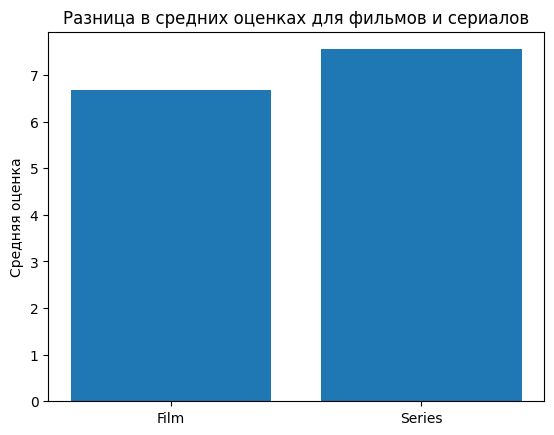

In [476]:
xs = ['Film','Series']
counts = [np.mean(Films['Rate']), 
          np.mean(Series['Rate'])]
plt.bar(xs,counts)
plt.ylabel("Средняя оценка")
plt.title('Разница в средних оценках для фильмов и сериалов')
plt.show()

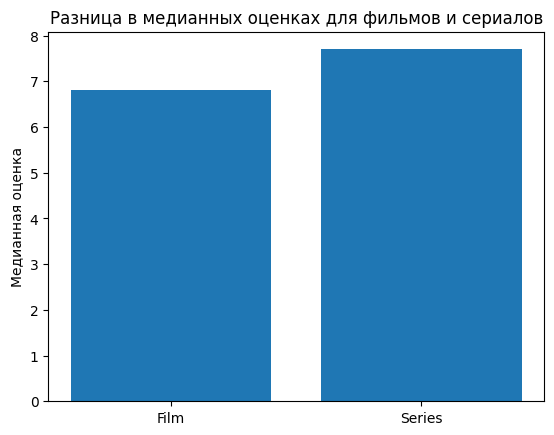

In [477]:
xs = ['Film','Series']
counts = [np.median(Films['Rate']), 
          np.median(Series['Rate'])]
plt.bar(xs,counts)
plt.ylabel("Медианная оценка")
plt.title('Разница в медианных оценках для фильмов и сериалов')
plt.show()

Как видно, у сериалов оценка выше. 
Чтобы выставить оценку обычному полнометражному фильму, нужно потратить полтора-два часа своей жизни на просмотр - и все, у вас полное право его оценивать, и оценка может быть абсолютно любой. С сериалами все немножко не так. Многие сериалы люди "пробуют на зубок" и бросают на первой-второй серии, потому что "не мое". При этом мало кто из таких людей пойдет выставлять ему оценку - мало ли, вдруг он потом раскачается, но проверять неохота. Таким образом, отваливается значительная часть людей, которые могли бы поставить ему низкую оценку (но попросту не стали его смотреть). А уж если сериал цепляет и люди смотрят его несколько сезонов, тогда почти наверняка оценка будет близка к максимальной. 
То есть, в сериалах выставляют меньше низких оценок и больше высоких. Отсюда и перекос по сравнению с фильмами, где шанс на получение высокой и низкой оценки примерно одинаковый.

## Оценим популярность

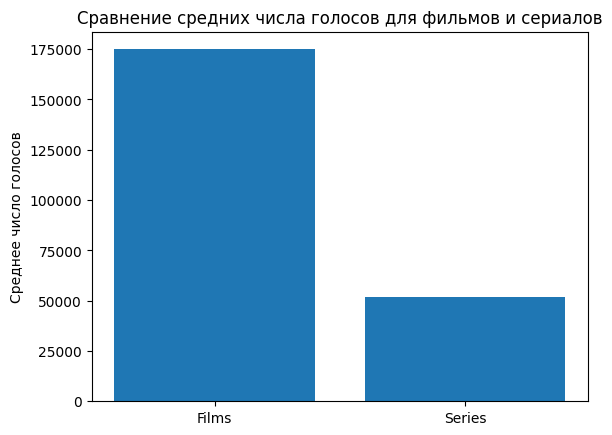

In [478]:
xs = ['Films','Series']
counts = [np.mean(Films['Votes']), 
          np.mean(Series['Votes'])]
plt.bar(xs,counts)
plt.ylabel("Среднее число голосов")
plt.title('Сравнение средних числа голосов для фильмов и сериалов')
plt.show()

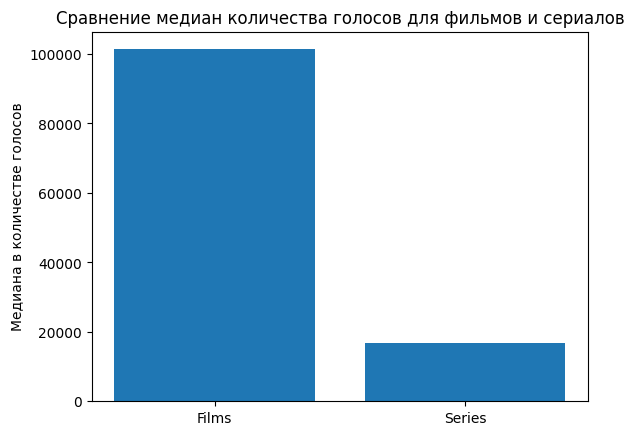

In [479]:
xs = ['Films','Series']
counts = [np.median(Films['Votes']), 
          np.median(Series['Votes'])]
plt.bar(xs,counts)
plt.ylabel("Медиана в количестве голосов")
plt.title('Сравнение медиан количества голосов для фильмов и сериалов')
plt.show()

Можно сделать вывод, что фильмы намного популярнее!

# Поиск самого плодовитового на оценки года в кино

In [480]:
# Уникальные даты фильмов из датасетов
Film_dates_old = Films['Date'].unique()
Series_dates_old = Series['Date'].unique()

# Сортирую даты 
Film_dates_old = np.array(sorted(Film_dates_old))
Series_dates_old = np.array(sorted(Series_dates_old))

# 
Films_years_old = [Films[Films['Date'] == Film_dates_old[i]] for i in range(len(Film_dates_old))]
Series_years_old = [Series[Series['Date'] == Series_dates_old[i]] for i in range(len(Series_dates_old))]

In [481]:
Films_years = []
Film_dates = []
Series_years = []
Series_dates = []

#Отсекаю годы по количеству фильмов/сериалов

for i in range(len(Films_years_old)):
    if Films_years_old[i]['Name'].count() >= 20:
        Films_years.append(Films_years_old[i])
        Film_dates.append(Film_dates_old[i])

for i in range(len(Series_years_old)):
    if Series_years_old[i]['Name'].count() >= 5:
        Series_years.append(Series_years_old[i])
        Series_dates.append(Series_dates_old[i])

In [482]:
# Средние оценки фильмов/сериалов за каждый отобранный год

Rates_years_Films = []

for k in range(len(Films_years)):
    Rates_years_Films.append(np.mean(Films_years[k]['Rate']))

Rates_years_Series = []

for k in range(len(Series_years)):
    Rates_years_Series.append(np.mean(Series_years[k]['Rate']))

In [483]:
for i in range(len(Films_years)):
    print('Год', Film_dates[i], ' средняя оценка за год:', Rates_years_Films[i])

Год 1981  средняя оценка за год: 6.952173913043478
Год 1983  средняя оценка за год: 6.747619047619047
Год 1984  средняя оценка за год: 6.965517241379311
Год 1985  средняя оценка за год: 6.868571428571428
Год 1986  средняя оценка за год: 6.806451612903224
Год 1987  средняя оценка за год: 6.823529411764706
Год 1988  средняя оценка за год: 6.973684210526316
Год 1989  средняя оценка за год: 6.948387096774193
Год 1990  средняя оценка за год: 7.0814814814814815
Год 1991  средняя оценка за год: 6.870370370370371
Год 1992  средняя оценка за год: 7.042424242424243
Год 1993  средняя оценка за год: 7.025
Год 1994  средняя оценка за год: 7.141379310344829
Год 1995  средняя оценка за год: 7.004000000000001
Год 1996  средняя оценка за год: 6.793023255813954
Год 1997  средняя оценка за год: 6.873584905660379
Год 1998  средняя оценка за год: 6.775925925925925
Год 1999  средняя оценка за год: 6.95090909090909
Год 2000  средняя оценка за год: 6.9125000000000005
Год 2001  средняя оценка за год: 6.8388059

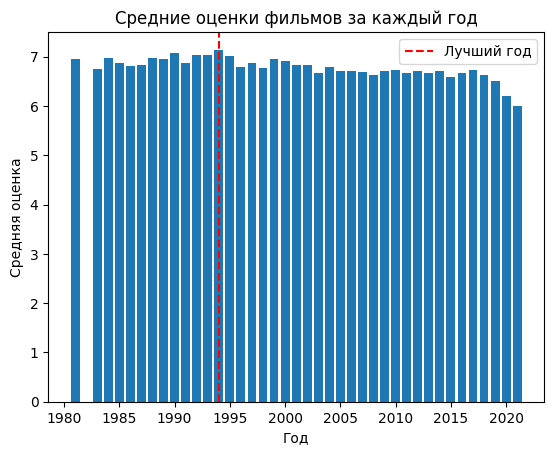

In [484]:
xs = Film_dates
counts = Rates_years_Films
plt.bar(xs,counts)
plt.xlabel('Год')
plt.ylabel("Средняя оценка")
plt.title('Средние оценки фильмов за каждый год')
plt.axvline(1994,label='Лучший год',linestyle='dashed',color='r')
plt.legend()
plt.show()

#### Кино по оценкам немного просело в последние годы. Возможно виноват ковид. А возможно общество деградирует...

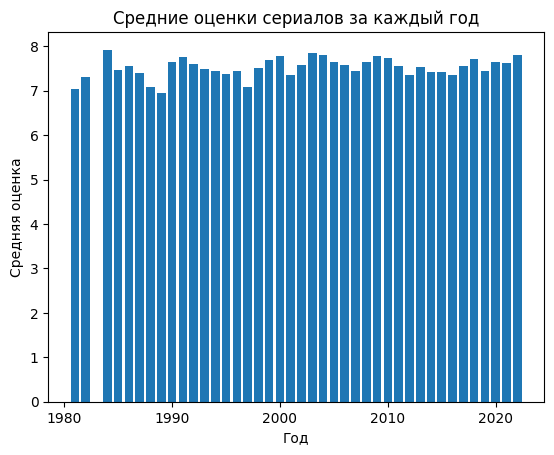

In [485]:
xs = Series_dates[3:]
counts = Rates_years_Series[3:]
plt.bar(xs,counts)
plt.xlabel('Год')
plt.ylabel("Средняя оценка")
plt.title('Средние оценки сериалов за каждый год')
plt.show()

#### Сериалы стабильно высоко ценятся. Если смотреть на ковидные годы, то, кажется, ковид помог сериалам

## Лучший год в истории кино

In [486]:
Best_year_film = Film_dates[Rates_years_Films.index(max(Rates_years_Films))]

In [487]:
Films[Films['Date'] == Best_year_film].sort_values(by = 'Rate', ascending=False)

,Name,Date,Rate,Votes,Genre,Duration,Type,Certificate,Episodes,Nudity,Violence,Profanity,Alcohol,Frightening
201,The Shawshank Redemption,1994,9.3,2474122.0,Drama,142.0,Film,R,-,Mild,Moderate,Severe,Mild,Moderate
320,Pulp Fiction,1994,8.9,1915230.0,"Crime, Drama",154.0,Film,R,-,Moderate,Severe,Severe,Severe,Moderate
435,Forrest Gump,1994,8.8,1912582.0,"Drama, Romance",142.0,Film,PG-13,-,Moderate,Moderate,Moderate,Moderate,Moderate
350,Léon,1994,8.5,1085586.0,"Action, Crime, Drama",110.0,Film,R,-,Mild,Severe,Moderate,Moderate,Moderate
1073,The Lion King,1994,8.5,986883.0,"Animation, Adventure, Drama",88.0,Film,G,-,NaN,Mild,NaN,NaN,Moderate
3535,Chung Hing sam lam,1994,8.1,72157.0,"Comedy, Crime, Drama",102.0,Film,PG-13,-,Mild,Mild,NaN,Moderate,Mild
3118,Ed Wood,1994,7.8,171031.0,"Biography, Comedy, Drama",127.0,Film,R,-,Mild,Mild,Moderate,Moderate,Mild
4090,Clerks,1994,7.7,216743.0,Comedy,92.0,Film,R,-,Moderate,Mild,Severe,Moderate,NaN
1685,The Crow,1994,7.6,173720.0,"Action, Drama, Fantasy",102.0,Film,R,-,Moderate,Severe,Severe,Severe,Severe
1277,Interview with the Vampire: The Vampire Chroni...,1994,7.5,304969.0,"Drama, Horror",123.0,Film,R,-,Moderate,Severe,Mild,Mild,Severe


Лучший год в истории кино, как и предполагалось, 1994!!!

## Лучший год в истории сериалов

In [488]:
Best_year_series = Series_dates[Rates_years_Series.index(max(Rates_years_Series))]

In [489]:
Series[Series['Date'] == Best_year_series].sort_values(by = 'Rate', ascending=False)

,Name,Date,Rate,Votes,Genre,Duration,Type,Certificate,Episodes,Nudity,Violence,Profanity,Alcohol,Frightening
500,Avatar: The Last Airbender,1974,9.3,273781.0,"Animation, Action, Adventure",23.0,Series,TV-Y7-FV,62,NaN,Mild,NaN,NaN,Moderate
711,Fleabag,1974,8.7,123036.0,"Comedy, Drama",27.0,Series,TV-MA,12,Moderate,Mild,Severe,Moderate,Mild
3769,Samurai Jack,1974,8.5,49177.0,"Animation, Action, Adventure",25.0,Series,TV-14,62,Mild,Moderate,Mild,NaN,Moderate
4183,This Way Up,1974,7.8,4538.0,Comedy,25.0,Series,NaN,12,No Rate,No Rate,No Rate,No Rate,No Rate
2116,Miss Scarlet and the Duke,1974,7.6,4598.0,"Crime, Drama",NaN,Series,TV-14,12,No Rate,Moderate,Moderate,No Rate,No Rate
499,Élite,1974,7.5,63761.0,"Crime, Drama, Thriller",60.0,Series,TV-MA,40,Severe,Mild,Moderate,Severe,Mild


Как можно понять отсюда, датасет по сериалам сделан не очень качественно. Аватар вышел в 2005 году, Fleabag в 2016, явно не в 1974. Поэтому доверять анализу сериалов смысла видимо нет. По фильмам же сходу таких проблем мы не увидели

# Гипотезы!

1. Гипотезы о рейтингах фильмов и сериалов

H₀: Рейтинги фильмов с высоким количеством голосов (например, >10000) не отличаются от рейтингов фильмов с меньшим количеством голосов.

H₁: Фильмы с большим количеством голосов имеют более высокие рейтинги.

2. Гипотезы о жанрах

H₀: Частота появления жанра "Action" (или любой другой жанр) одинакова в фильмах и сериалах.

H₁: Частота появления жанра "Action" (или любой другой жанр) различается между фильмами и сериалами.

3. Гипотезы о продолжительности

H₀: Фильмы, созданные после 2010 года, имеют меньшую среднюю продолжительность, что и фильмы, созданные до 2010 года.

H₁: Фильмы, созданные после 2010 года, имеют более длительное (или равное) время.

4. Гипотезы о влиянии возрастного рейтинга

H₀: Средний рейтинг фильмов с возрастным ограничением "R" меньше среднему рейтингу фильмов с возрастным ограничением "PG-13".

H₁: Средний рейтинг фильмов с возрастным ограничением "R" больше или равен среднему рейтингу фильмов с возрастным ограничением "PG-13".

5. Гипотезы о динамике по годам

H₀: Средний рейтинг фильмов уменьшается начиная с 2000 года.

H₁: Средний рейтинг фильмов увеличивается или не изменяется с 2000 года.

6. Гипотезы о содержании (контенте)

H₀: Степень насилия в фильмах не влияет на их рейтинги.

H₁: Фильмы с высоким уровнем насилия получают более низкие (или высокие) рейтинги.

7. Гипотезы о связях между переменными

H₀: Рейтинг фильма не зависит от количества голосов.

H₁: Существует положительная зависимость между рейтингом фильма и количеством голосов.

## תודה על ההרפתקה. עכשיו לכו למצוא אחד חדש